In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/home/ronaldm/Desktop/Scanned/Trans_Yeast.txt' , delimiter='\t')
print(df)

       23   25  1
0      24   25  1
1      34   40  1
2      35   40  1
3      36   40  1
4      37   40  1
...   ...  ... ..
1056   89  659  1
1057  256  659  1
1058  559  659  1
1059  254  660  1
1060  254  661  1

[1061 rows x 3 columns]


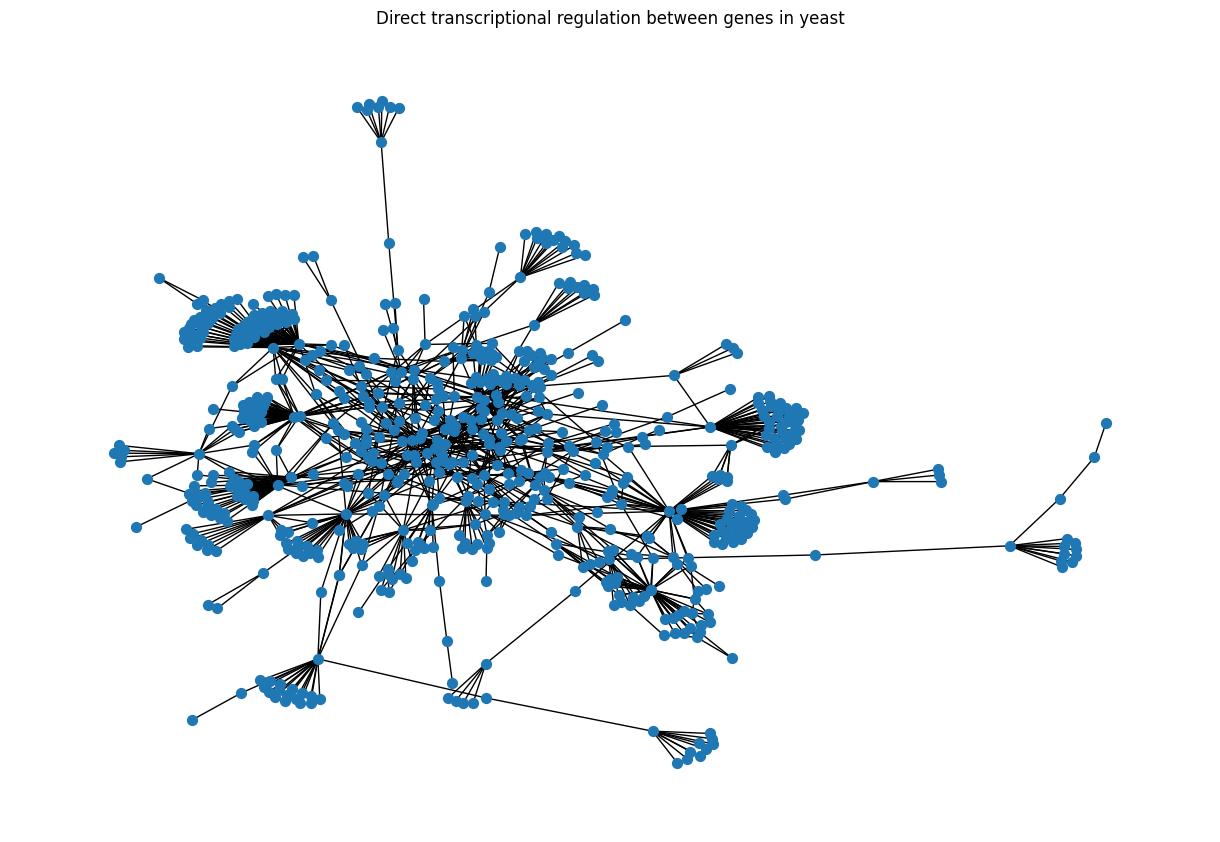

In [3]:
G = nx.Graph()
G.add_edges_from(df.iloc[:, :2].values)

# Draw the graph
plt.figure(figsize=(12, 8))
plt.clf()
nx.draw(G, with_labels=False, node_size=50, font_size=8)
plt.title("Direct transcriptional regulation between genes in yeast")
plt.savefig("Trans_Yeast.png")
plt.show()

In [4]:
G = nx.Graph()
G.add_edges_from(df.iloc[:, :2].values)

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Network density
density = nx.density(G)

# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# Degree distribution (basic)
degree_sequence = [d for n, d in G.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)

# Connected components
num_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc)

# Average shortest path length (only for largest connected component)
avg_path_length = nx.average_shortest_path_length(G_lcc)

# Clustering coefficient
avg_clustering = nx.average_clustering(G)

# Print the results
print("=== Network Statistics ===")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {density:.4f}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")
print(f"Number of connected components: {num_components}")
print(f"Average shortest path length (in LCC): {avg_path_length:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.2f}")


=== Network Statistics ===
Number of nodes: 662
Number of edges: 1061
Network density: 0.0048
Average degree: 3.21
Maximum degree: 71
Minimum degree: 1
Number of connected components: 1
Average shortest path length (in LCC): 5.20
Average clustering coefficient: 0.05


# Degree Distribution


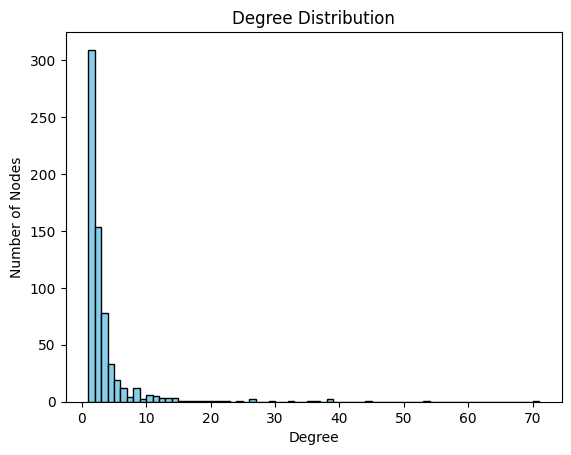

In [5]:
import matplotlib.pyplot as plt

degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=range(1, max(degree_sequence)+1), color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()


# Largest Connected Component (LCC)

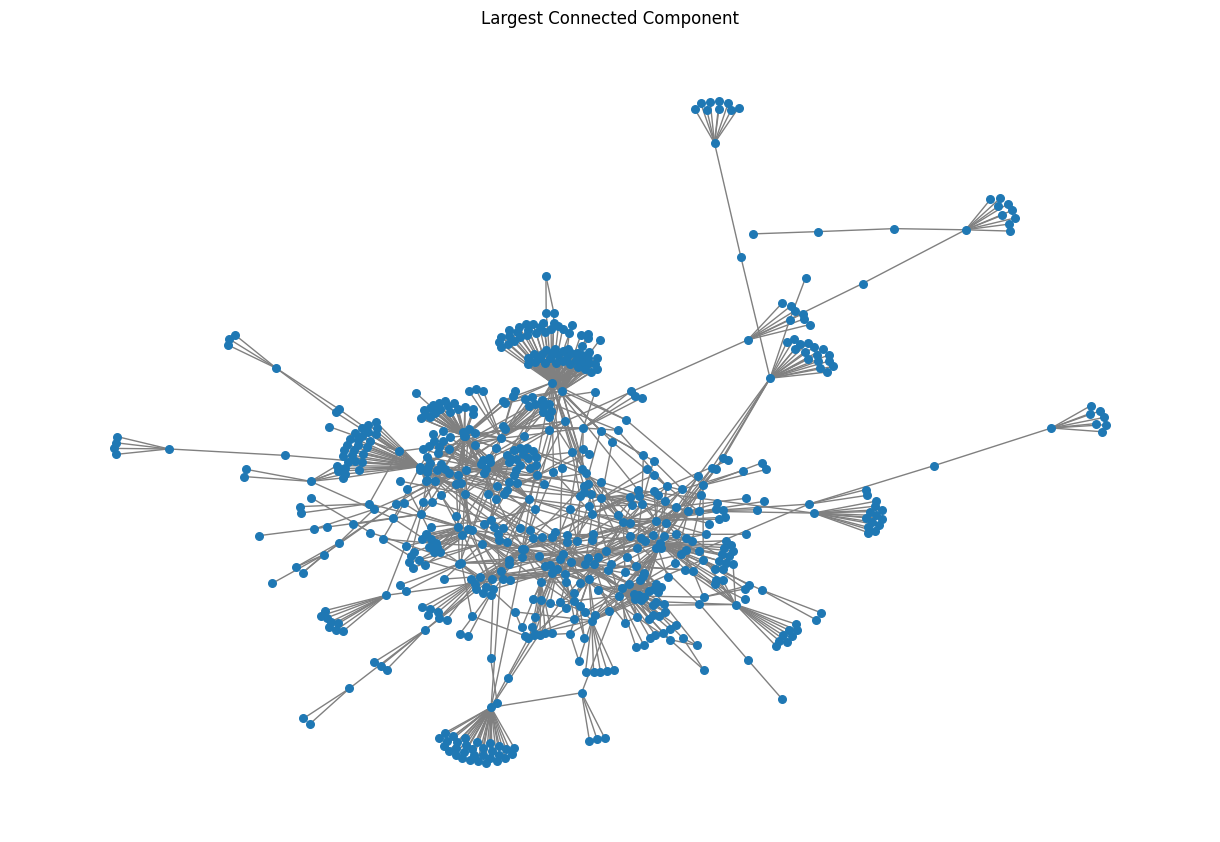

In [6]:
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc)

plt.figure(figsize=(12, 8))
nx.draw(G_lcc, node_size=30, edge_color='gray', with_labels=False)
plt.title("Largest Connected Component")
plt.show()


# Centrality Analysis

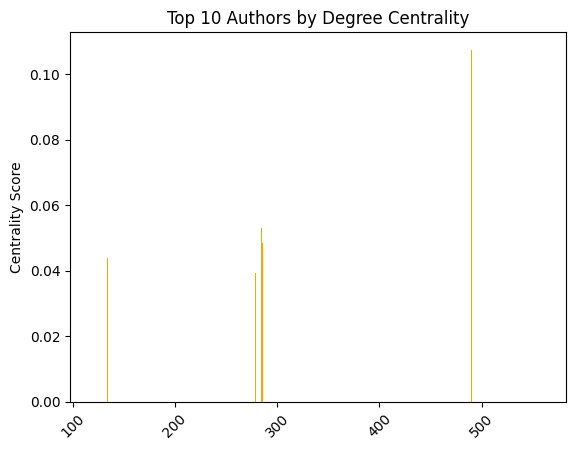

In [7]:
centrality = nx.degree_centrality(G)
top_central = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

names, scores = zip(*top_central)
plt.bar(names, scores, color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Degree Centrality")
plt.ylabel("Centrality Score")
plt.show()


# Clustering Coefficient Distribution

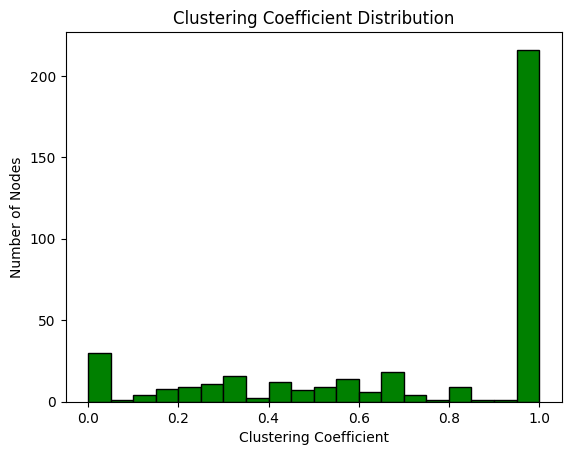

In [9]:
clustering = nx.clustering(G)
plt.hist(list(clustering.values()), bins=20, color='green', edgecolor='black')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.show()


# Community Detection

In [8]:
import community as community_louvain

partition = community_louvain.best_partition(G)
values = list(partition.values())

plt.figure(figsize=(12, 8))
nx.draw(G, node_color=values, node_size=40, cmap=plt.cm.Set3, with_labels=False)
plt.title("Community Structure in NetSci Network")
plt.show()


ModuleNotFoundError: No module named 'community'